In [1]:
#strategy of choice

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from statistics import mean as meanlist

def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def sort_by_clust(x, k):
    ans = []
    length = x.shape[0]
    x0 = x[:, 0]
    y0 = x[:, 1]
    for i in range(k):
        fil = list(filter(lambda q: x[q][2] == i, range(length)))
        ans = np.concatenate([ans, x0[fil]])
    for i in range(k):
        fil = list(filter(lambda q: x[q][2] == i, range(length)))
        ans = np.concatenate([ans, y0[fil]])
    return ans.reshape(2, length).T

def KMeans4(matr, k = 2, seed = 4, eps = 0.0001, limit_of_rec = 500, show_work = False):
    np.random.seed(seed)
    x = np.asarray(matr[:, 0])
    y = np.asarray(matr[:, 1])
    
    length = len(x)
    matr = np.concatenate([x, y, np.random.randint(0, k, length, dtype = int)])
    matr = matr.reshape(3, length).T
    
    xc = np.random.randint(0, length, k)
    yc = np.random.randint(0, length, k)
    xc = x[xc]
    yc = y[yc]
    limit = limit_of_rec
    while True:
        limit -= 1
        if limit == 0:
            if show_work:
                print("Calculated with the achievement of the limit number of iterations: ", limit_of_rec)
            break
        for i in range(length):
            clast = k - 1
            dist_to_clast = dist(matr[i][0], matr[i][1], xc[k - 1], yc[k - 1])
            for j in range(k - 1):
                cur_dist = dist(matr[i][0], matr[i][1], xc[j], yc[j])
                if cur_dist < dist_to_clast:
                    dist_to_clast = cur_dist
                    clast = j
            matr[i][2] = clast
        sums = 0
        for i in range(k):
            fil = list(filter(lambda q: matr[q][2] == i, range(length)))
            if len(fil) == 0:
                sums = eps + 1
                r = np.random.randint(length)
                xc[i] = x[r]
                yc[i] = y[r]
            else:
                xcc = xc[i]
                ycc = yc[i]
                xc[i] = np.mean(x[fil])
                yc[i] = np.mean(y[fil])
                sums += dist(xc[i], yc[i], xcc, ycc)
        if sums < eps:
            if show_work:
                print("Calculated with given accuracy, number of iterations =", limit_of_rec - limit)
            break
    plt.scatter(xc, yc, marker = "v", c = 'r')
    return matr[:, 2]

sam, k = eval(input("Input number of dots and number of clusters\n"))
x, y = make_blobs(n_samples = sam, n_features = 2, centers = k, random_state = 12)
a = KMeans4(x, k = k, eps = 1, show_work = True)

length = x.shape[0]
matr_dist = np.full(length ** 2, 0).reshape(length, length)
for i in range(length):
    for j in range(length):
        matr_dist[i][j] = dist(x[i][0], x[i][1], x[j][0], x[j][1])
plt.scatter(x[:, 0], x[:, 1], c = a)
plt.matshow(matr_dist)

x = np.concatenate([x.ravel(), a]).reshape(3, length).T
plt.show()
    

Input number of dots and number of clusters
1000, 12
Calculated with given accuracy, number of iterations = 6


<Figure size 640x480 with 1 Axes>

<Figure size 480x480 with 1 Axes>

Input number of dots and number of clusters
1000, 12
Calculated with given accuracy, number of iterations = 9


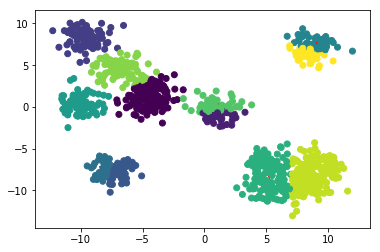

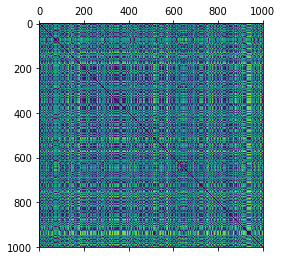

In [2]:
#strategy of random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from statistics import mean as meanlist

def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def sort_by_clust(x, k):
    ans = []
    length = x.shape[0]
    x0 = x[:, 0]
    y0 = x[:, 1]
    for i in range(k):
        fil = list(filter(lambda q: x[q][2] == i, range(length)))
        ans = np.concatenate([ans, x0[fil]])
    for i in range(k):
        fil = list(filter(lambda q: x[q][2] == i, range(length)))
        ans = np.concatenate([ans, y0[fil]])
    return ans.reshape(2, length).T

def KMeans4(matr, k = 2, seed = 4, eps = 0.0001, limit_of_rec = 500, show_work = False):
    np.random.seed(seed)
    x = np.asarray(matr[:, 0])
    y = np.asarray(matr[:, 1])
    
    length = len(x)
    matr = np.concatenate([x, y, np.random.randint(0, k, length, dtype = int)])
    matr = matr.reshape(3, length).T
    
    xc = np.random.rand(k) * (x.max() - x.min()) + x.min()
    yc = np.random.rand(k) * (y.max() - y.min()) + y.min()
    limit = limit_of_rec
    while True:
        limit -= 1
        if limit == 0:
            if show_work:
                print("Calculated with the achievement of the limit number of iterations: ", limit_of_rec)
            break
        for i in range(length):
            clast = k - 1
            dist_to_clast = dist(matr[i][0], matr[i][1], xc[k - 1], yc[k - 1])
            for j in range(k - 1):
                cur_dist = dist(matr[i][0], matr[i][1], xc[j], yc[j])
                if cur_dist < dist_to_clast:
                    dist_to_clast = cur_dist
                    clast = j
            matr[i][2] = clast
        sums = 0
        for i in range(k):
            fil = list(filter(lambda q: matr[q][2] == i, range(length)))
            if len(fil) == 0:
                sums = eps + 1
                r = np.random.randint(length)
                xc[i] = x[r]
                yc[i] = y[r]
            else:
                xcc = xc[i]
                ycc = yc[i]
                xc[i] = np.mean(x[fil])
                yc[i] = np.mean(y[fil])
                sums += dist(xc[i], yc[i], xcc, ycc)
        if sums < eps:
            if show_work:
                print("Calculated with given accuracy, number of iterations =", limit_of_rec - limit)
            break
    plt.scatter(xc, yc, marker = "v", c = 'r')
    return matr[:, 2]

sam, k = eval(input("Input number of dots and number of clusters\n"))
x, y = make_blobs(n_samples = sam, n_features = 2, centers = k, random_state = 12)
a = KMeans4(x, k = k, eps = 1, show_work = True)

length = x.shape[0]
matr_dist = np.full(length ** 2, 0).reshape(length, length)
for i in range(length):
    for j in range(length):
        matr_dist[i][j] = dist(x[i][0], x[i][1], x[j][0], x[j][1])
plt.scatter(x[:, 0], x[:, 1], c = a)
plt.matshow(matr_dist)

x = np.concatenate([x.ravel(), a]).reshape(3, length).T
plt.show()
   

Input number of dots and number of clusters
1000, 12
Calculated with given accuracy, number of iterations = 9


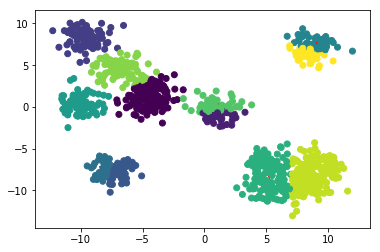

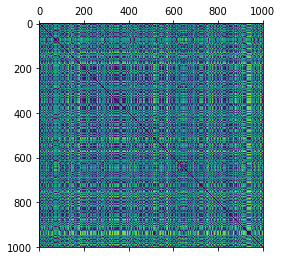

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from statistics import mean as meanlist

def dist(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

def sort_by_clust(x, k):
    ans = []
    length = x.shape[0]
    x0 = x[:, 0]
    y0 = x[:, 1]
    for i in range(k):
        fil = list(filter(lambda q: x[q][2] == i, range(length)))
        ans = np.concatenate([ans, x0[fil]])
    for i in range(k):
        fil = list(filter(lambda q: x[q][2] == i, range(length)))
        ans = np.concatenate([ans, y0[fil]])
    return ans.reshape(2, length).T

def KMeans4(matr, k = 2, seed = 4, eps = 0.0001, limit_of_rec = 500, show_work = False):
    np.random.seed(seed)
    x = np.asarray(matr[:, 0])
    y = np.asarray(matr[:, 1])
    
    length = len(x)
    matr = np.concatenate([x, y, np.random.randint(0, k, length, dtype = int)])
    matr = matr.reshape(3, length).T
    
    xc = np.random.rand(k) * (x.max() - x.min()) + x.min()
    yc = np.random.rand(k) * (y.max() - y.min()) + y.min()
    limit = limit_of_rec
    while True:
        limit -= 1
        if limit == 0:
            if show_work:
                print("Calculated with the achievement of the limit number of iterations: ", limit_of_rec)
            break
        for i in range(length):
            clast = k - 1
            dist_to_clast = dist(matr[i][0], matr[i][1], xc[k - 1], yc[k - 1])
            for j in range(k - 1):
                cur_dist = dist(matr[i][0], matr[i][1], xc[j], yc[j])
                if cur_dist < dist_to_clast:
                    dist_to_clast = cur_dist
                    clast = j
            matr[i][2] = clast
        sums = 0
        for i in range(k):
            fil = list(filter(lambda q: matr[q][2] == i, range(length)))
            if len(fil) == 0:
                sums = eps + 1
                r = np.random.randint(length)
                xc[i] = x[r]
                yc[i] = y[r]
            else:
                xcc = xc[i]
                ycc = yc[i]
                xc[i] = np.mean(x[fil])
                yc[i] = np.mean(y[fil])
                sums += dist(xc[i], yc[i], xcc, ycc)
        if sums < eps:
            if show_work:
                print("Calculated with given accuracy, number of iterations =", limit_of_rec - limit)
            break
    plt.scatter(xc, yc, marker = "v", c = 'r')
    return matr[:, 2]

sam, k = eval(input("Input number of dots and number of clusters\n"))
x, y = make_blobs(n_samples = sam, n_features = 2, centers = k, random_state = 12)
a = KMeans4(x, k = k, eps = 1, show_work = True)

length = x.shape[0]
matr_dist = np.full(length ** 2, 0).reshape(length, length)
for i in range(length):
    for j in range(length):
        matr_dist[i][j] = dist(x[i][0], x[i][1], x[j][0], x[j][1])
plt.scatter(x[:, 0], x[:, 1], c = a)
plt.matshow(matr_dist)

x = np.concatenate([x.ravel(), a]).reshape(3, length).T
plt.show()
    